In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%cd "C:\Users\Gamer\Desktop\CISC 451\CISC451\a2"

C:\Users\Gamer\Desktop\CISC 451\CISC451\a2


In [2]:
df = pd.read_csv("data/C2T1_Train.csv")

In [3]:
df.shape

(90766, 50)

In [4]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id2             90766 non-null  int64 
 1   patient_nbr2              90766 non-null  int64 
 2   race                      90766 non-null  object
 3   gender                    90766 non-null  object
 4   age                       90766 non-null  object
 5   weight                    90766 non-null  object
 6   admission_type_id         90766 non-null  int64 
 7   discharge_disposition_id  90766 non-null  int64 
 8   admission_source_id       90766 non-null  int64 
 9   time_in_hospital          90766 non-null  int64 
 10  payer_code                90766 non-null  object
 11  medical_specialty         90766 non-null  object
 12  num_lab_procedures        90766 non-null  int64 
 13  num_procedures            90766 non-null  int64 
 14  num_medi

In [5]:
df.head()

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [6]:
df.groupby('readmitted').size()

readmitted
&lt;30    10173
&gt;30    31232
NO     49361
dtype: int64

In [7]:
df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
90762,443840543,74694092,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
90763,443846909,41088659,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
90764,443849927,31693541,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [8]:
df = df.replace('?',np.nan)

In [9]:
# let's make the output variable binary so we can approach the binary classification task first
df['readmitted']=pd.Series([0 if x=='NO' else 1 for x in df['readmitted']])

&lt;AxesSubplot:xlabel=&#39;readmitted&#39;&gt;

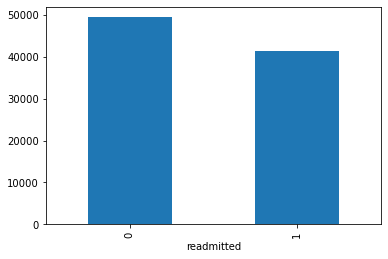

In [10]:
df.groupby('readmitted').size().plot(kind='bar')